We adopted a roving oddball paradigm. The trains of repetitive tones of different frequencies were randomly presented. Epidural ECoG recordings were taken in the passive listening condition while monkeys were awake.
ECoG data were sampled at 1KHz.


Komatsu, M., Takaura, K., & Fujii, N. (2015). "Mismatch negativity in common marmosets: Whole-cortical recordings with multi-channel electrocorticograms." Scientific Reports, 5, 15006.

Canales-Johnson, A., Borges, A. F. T., Komatsu, M., Fujii, N., Fahrenfort, J. J., Miller, K. J., & Noreika, V. (2021). Broadband Dynamics Rather than Frequency-Specific Rhythms Underlie Prediction Error in the Primate Auditory Cortex. Journal of Neuroscience, 41(45), 9374-9391.

In [277]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from mne_bids import BIDSPath, read_raw_bids

import mne
from mne.viz import plot_alignment, snapshot_brain_montage

from scipy.io import loadmat

from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal

from fooof import FOOOF, FOOOFGroup

In [130]:
subfolder = "./20160708S1_Auditory+Oddball_Kr_Misako+Komatsu-Kana+Takaura_mat_ECoG64-Event-BrainMap/"

In [175]:
repEvent = loadmat(subfolder + "repEvent.mat")
print(repEvent)

print(repEvent["Idx2Freq"].shape)
print(repEvent["Idx2Freq"])
print(repEvent["repEvent"].shape)
print(repEvent["repEvent"][0])
print(repEvent["repEvent"][:,0])

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Jul 25 11:47:34 2016', '__version__': '1.0', '__globals__': [], 'repEvent': array([[     1,      4,      6,    503,      3, 125360],
       [     2,      6,      7,    503,     11, 126869],
       [     3,      7,      8,    503,     11, 132402],
       ...,
       [    58,      3,     13,    503,      5, 883886],
       [    59,     13,      8,    503,      5, 886401],
       [    60,      8,     12,    503,      5, 888916]], dtype=int32), 'Idx2Freq': array([[ 250.        ,  297.30177875,  353.55339059,  420.44820763,
         500.        ,  594.6035575 ,  707.10678119,  840.89641525,
        1000.        , 1189.207115  , 1414.21356237, 1681.79283051,
        2000.        , 2378.41423001, 2828.42712475, 3363.58566101,
        4000.        , 4756.82846001, 5656.85424949, 6727.17132203]])}
(1, 20)
[[ 250.          297.30177875  353.55339059  420.44820763  500.
   594.6035575   707.10678119  840.89641525 1000.      

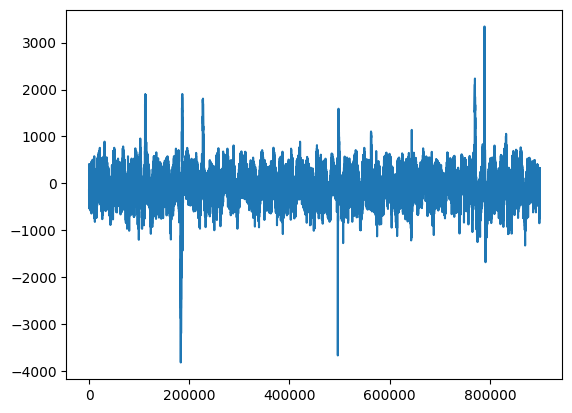

[-143 -188 -220 ...  -31  -93  -97]
step:  1000


In [159]:
data = loadmat(subfolder + "ECoG_ch1.mat")["ECoGData_ch1"][0]

# Start: 125360

data_size = int(900000)

plt.plot(data[:data_size])
plt.show()

fs = 1000

data = data[:data_size]

print(data)

size = int(len(data)/(900))
step = int((size/1))
print("step: ", step)

data = [data[i : i + size] for i in range(0, len(data), step)]

fm = FOOOF()

#spectra = np.ndarray(len(data))
spectra = []

freqs = []

#for signal in sub_signals:
for index, signal in enumerate(data):
    _freqs, powers = compute_spectrum(signal, fs)

    freqs.append(_freqs)
    spectra.append(powers)

freqs = np.array(freqs)
spectra = np.array(spectra)

In [160]:
fg = FOOOFGroup()
print(spectra.shape)
print(freqs.shape)
fg.fit(freqs[0], spectra)

(900, 501)
(900, 501)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 900 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                            Number of power spectra in the Group: 900                             
                                                                                                  
                       The model was run on the frequency range 1 - 500 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

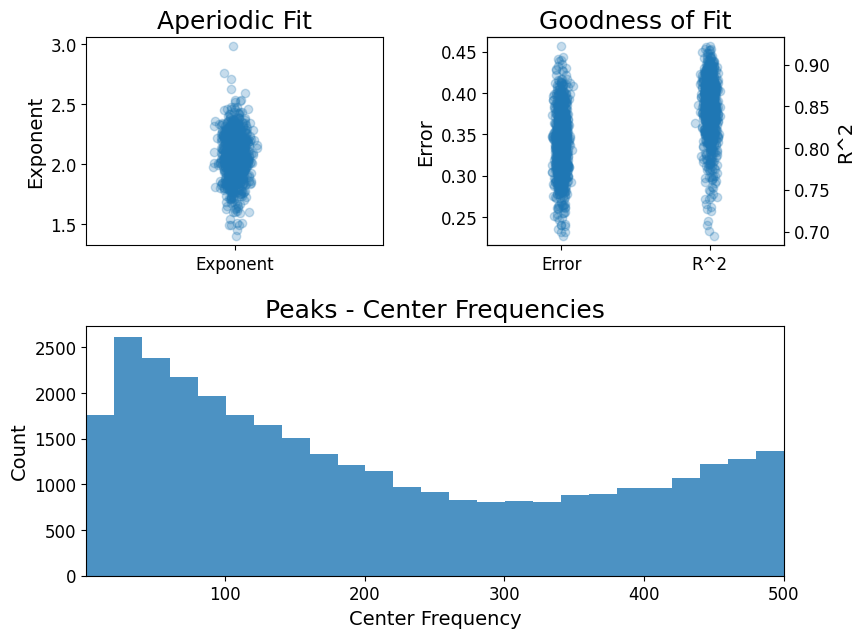

In [161]:
fg.print_results()
fg.plot()

0.03636395795659007
2.069451492385801
[125360 126869 132402 137935 139444 141959 144474 150007 151516 157049
 159564 162079 163588 166103 171636 174151 176666 182199 183708 185217
 187732 189241 194774 197289 199804 201313 202822 204331 206846 208355
 213888 219421 224954 226463 231996 234511 237026 238535 240044 241553
 247086 248595 251110 256643 262176 263685 269218 271733 273242 275757
 281290 286823 289338 294871 297386 302919 305434 307949 313482 314991
 317003 318512 321027 322536 325051 330584 333099 335614 337123 339638
 345171 346680 349195 350704 352213 354728 360261 362776 365291 367806
 369315 374848 376357 378872 381387 383902 389435 390944 393459 398992
 404525 410058 412573 414082 419615 425148 430681 433196 434705 440238
 441747 447280 449795 455328 456837 458346 459855 465388 470921 472430
 473939 479472 480981 483496 485005 490538 496071 498586 500095 505628
 508647 511162 512671 515186 517701 523234 524743 526252 528767 530276
 535809 541342 543857 545366 550899 556

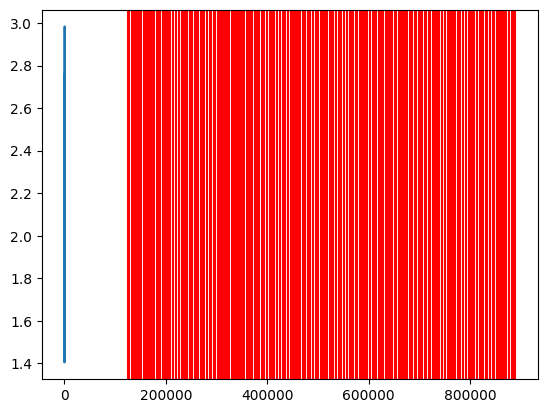

In [163]:
exps = fg.get_params('aperiodic_params', 'exponent')

print(np.var(exps))
print(np.mean(exps))

#print(repEvent["repEvent"][:][5])
train_onset = repEvent["repEvent"][:,5]
print(train_onset)

for xc in train_onset:
    plt.axvline(x=xc, color="red")

plt.plot(exps)

plt.show()


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 2 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



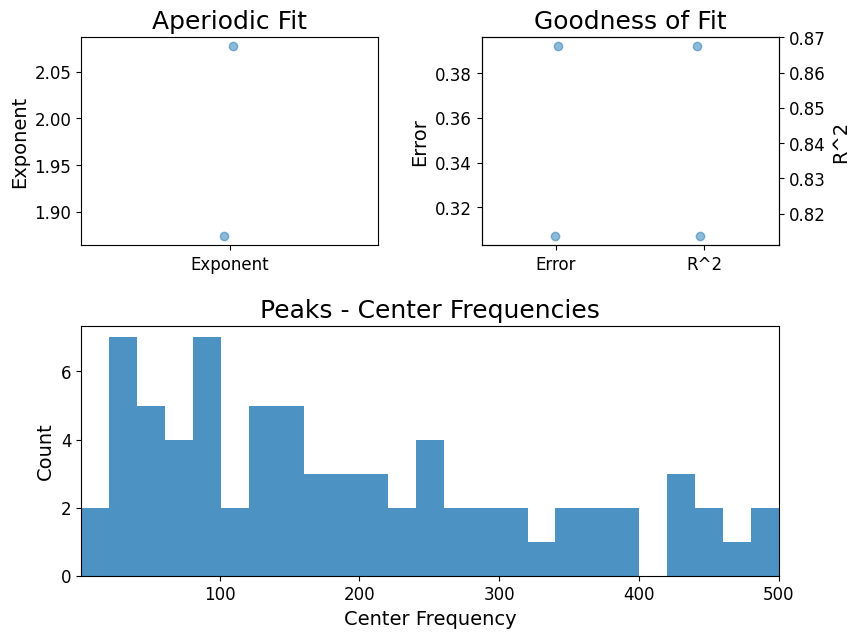

In [213]:
_index = 125360
jump = 1000
data = loadmat(subfolder + "ECoG_ch1.mat")["ECoGData_ch1"][0]
#print(data[_index-jump:_index][:])
freqs, powers_bef = compute_spectrum(data[_index-jump:_index], fs)
freqs, powers_aft = compute_spectrum(data[_index:_index+jump], fs)


fm_test = FOOOFGroup()
fm_test.fit(
    np.array(freqs), 
    np.array([powers_bef, powers_aft])
)
fm_test.plot()

In [280]:
data = loadmat(subfolder + "ECoG_ch51.mat")["ECoGData_ch51"][0]

data = filter_signal(data, 1000, "bandpass",f_range=(.1, 30))


arr_before = []
arr_after = []

jump = 1000

for index, onset in enumerate(train_onset):
    freqs, powers_bef = compute_spectrum(data[onset-jump:onset], fs)
    freqs, powers_aft = compute_spectrum(data[onset:onset+jump], fs)

    np.array(arr_after.append(powers_aft))
    np.array(arr_before.append(powers_bef))
    

#print(np.mean(arr_after, axis=0) == np.mean(arr_before, axis=0))


fm_before = FOOOFGroup()
fm_after = FOOOFGroup()


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 1 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



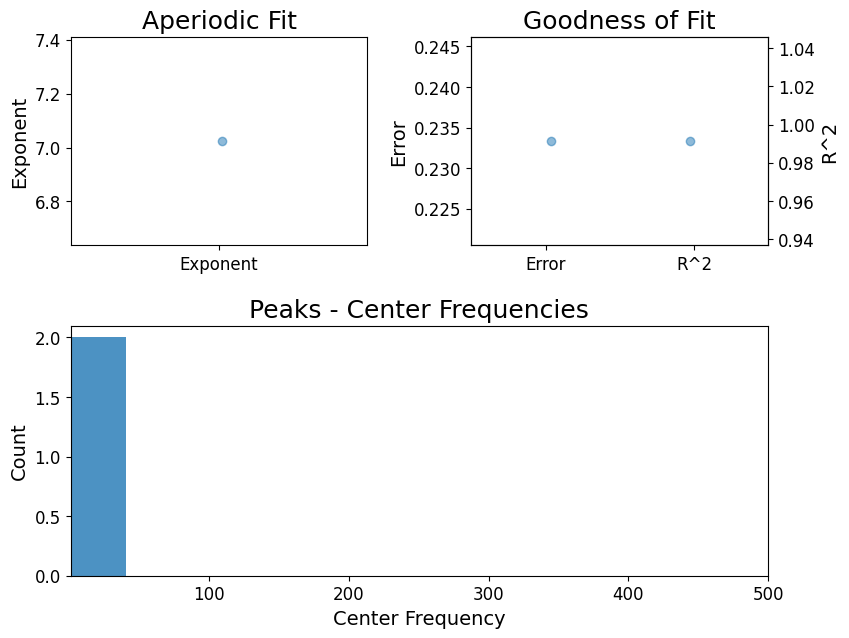

In [281]:
fm_before.fit(
    np.array(freqs), 
    np.array([np.mean(arr_before, axis=0)])
)
fm_before.plot()


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 1 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



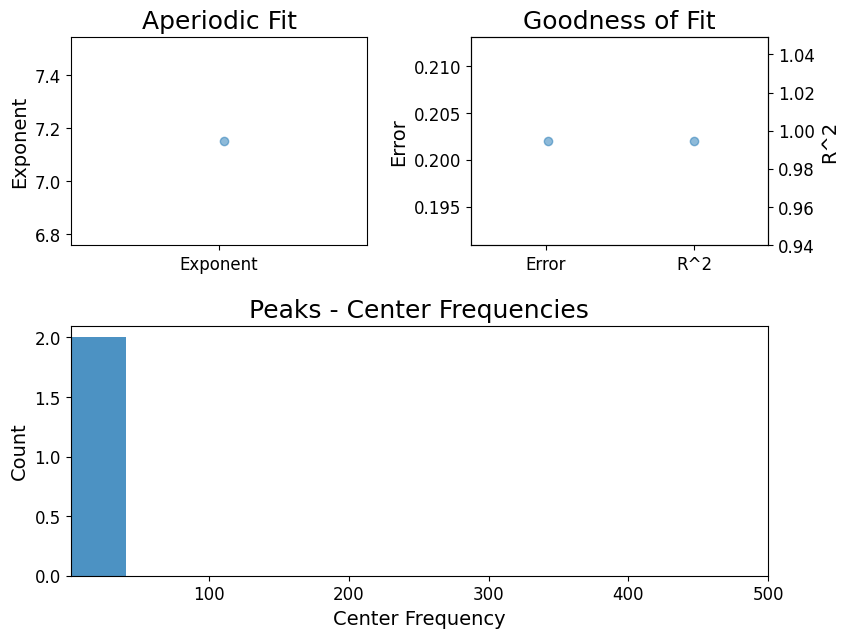

In [282]:
fm_after.fit(
    np.array(freqs), 
    np.array([np.mean(arr_after, axis=0)])
)
fm_after.plot()

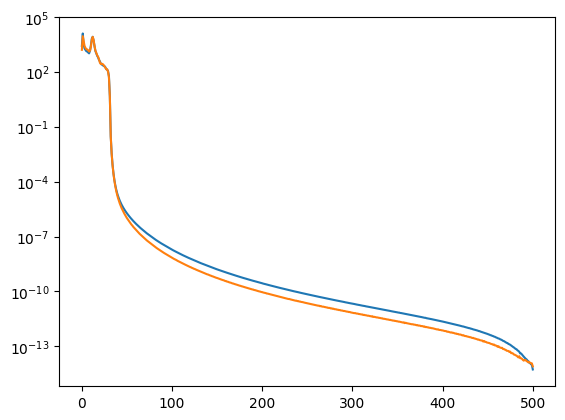

In [283]:
plt.semilogy(freqs, (np.mean(arr_before, axis=0)))
plt.semilogy(freqs, (np.mean(arr_after, axis=0)))
plt.show()